In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, threshold_mean
from skimage.morphology import binary_erosion, binary_closing, disk
from skimage.measure import label, regionprops

filepath = r'C:\Users\broke\Documents\Northwestern Files\PSED_2025\(250124)-calibration\experiment1-4'


img_numbers = np.arange(2425,2783)
area_save = np.zeros(img_numbers.shape)
diam_save = np.zeros(img_numbers.shape)
binary_img_save = np.zeros([len(img_numbers),800,800])
for i in range(len(img_numbers)):
    file_i = 'experiment1-4_' + str(img_numbers[i]) + '.bmp'
    raw_image_i = Image.open(filepath+'\\'+file_i)
    raw_image_i = np.array(raw_image_i).astype(int)
    gray_scale_i = rgb2gray(raw_image_i)
    gray_scale_i = gray_scale_i/np.max(gray_scale_i)
    threshold = threshold_otsu(gray_scale_i)
    binary_image = (gray_scale_i > threshold).astype(int)
    binary_image = binary_closing(binary_image).astype(int)
    binary_img_save[i,:,:] = binary_image
    props = regionprops(binary_image)
    area_save[i] = props[0].area
    diam_save[i] = props[0].feret_diameter_max


plt.imshow(raw_image_i)



KeyboardInterrupt: 

Text(0, 0.5, 'Pixels in Melt Pool')

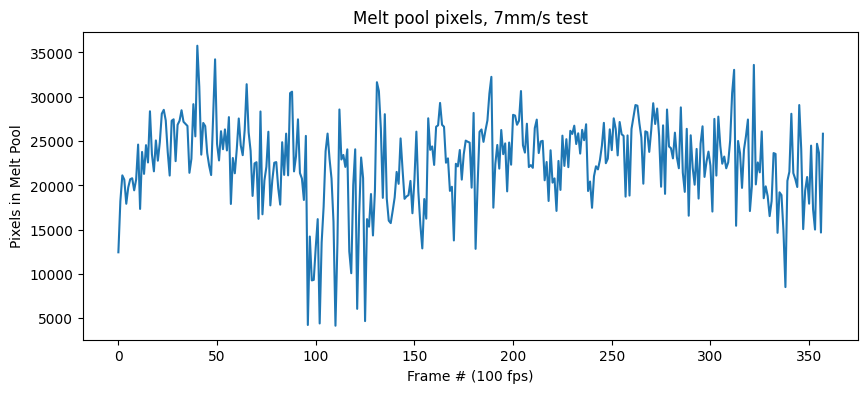

In [2]:
plt.figure(figsize=(10,4))
plt.plot(area_save)
plt.title('Melt pool pixels, 7mm/s test')
plt.xlabel('Frame # (100 fps)')
plt.ylabel('Pixels in Melt Pool')


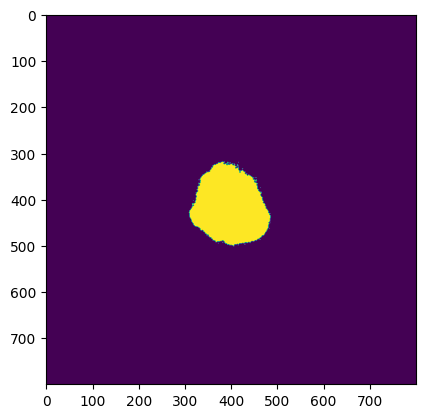

In [3]:
plt.imshow(binary_img_save[300])

In [4]:
gray_scale = rgb2gray(raw_image)
threshold = threshold_otsu(gray_scale)
binary_image = (gray_scale > threshold).astype(int)
plt.imshow(binary_image)

NameError: name 'raw_image' is not defined

Text(0, 0.5, 'Temperature [$\\degree C$]')

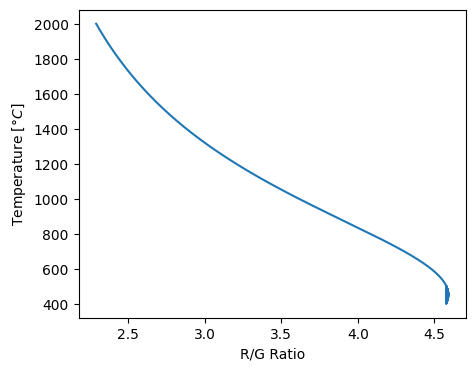

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, threshold_mean
from skimage.morphology import binary_erosion, binary_closing, disk, remove_small_objects
from skimage.measure import label, regionprops

calibration_path = r'C:\Users\broke\Documents\Northwestern Files\PSED_2025\Calibration_Curve_c1=0.5_c2=1.1.csv'
calibration_arr = np.loadtxt(calibration_path,skiprows=1,delimiter=',')

plt.figure(figsize=(5,4))
plt.plot(calibration_arr[:,0],calibration_arr[:,1])
plt.xlabel('R/G Ratio')
plt.ylabel('Temperature [$\degree C$]')

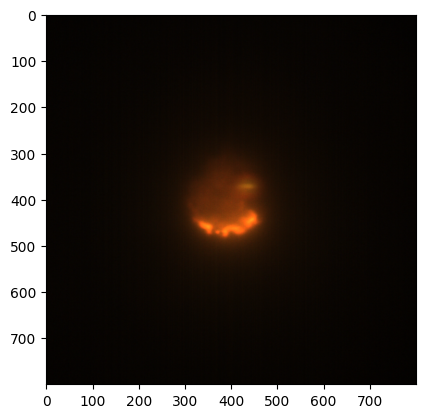

In [3]:
img_numbers = np.arange(2425,2782)
filepath = r'C:\Users\broke\Documents\Northwestern Files\PSED_2025\(250124)-calibration\experiment1-4'
meltpool_file = 'experiment1-4_' + str(img_numbers[115]) + '.bmp'
meltpool_img = np.array(Image.open(filepath + '\\' + meltpool_file))
plt.imshow(meltpool_img)


C:\Users\broke\AppData\Local\Temp\ipykernel_9332\2719735374.py:1: RuntimeWarning: divide by zero encountered in divide
  ratio_image = (meltpool_img[:,:,0]/meltpool_img[:,:,1])


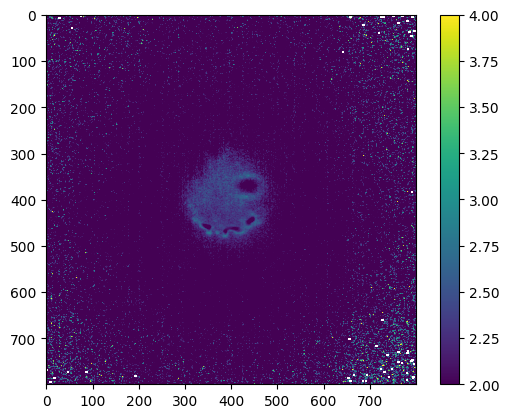

In [4]:

ratio_image = (meltpool_img[:,:,0]/meltpool_img[:,:,1])
gray_melt = rgb2gray(meltpool_img)
gray_melt = gray_melt / gray_melt.max()
plt.imshow(ratio_image)
plt.colorbar()
plt.clim(2,4)

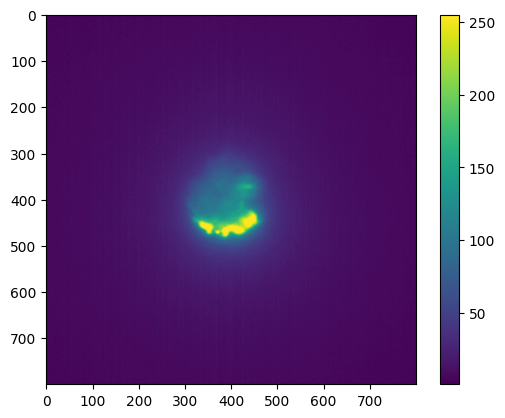

In [5]:

plt.imshow(meltpool_img[:,:,0])
plt.colorbar()

211.2674182852195
192.33623057048294
31729.0
0.41374613290065326
0.04440386509862326


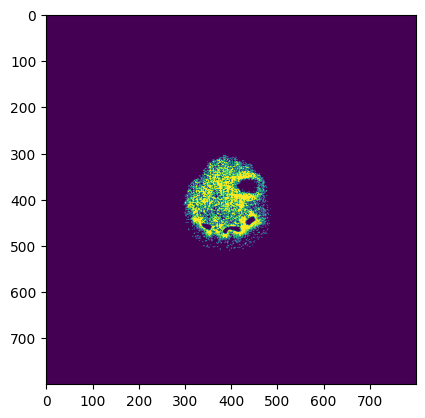

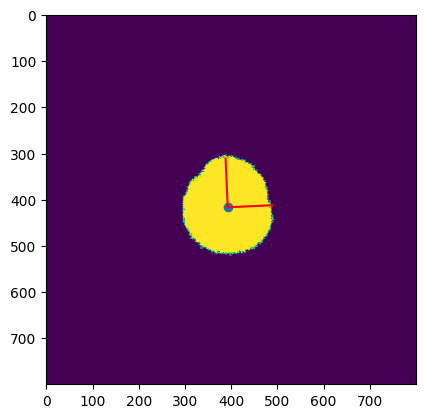

In [15]:
mask = np.logical_and(rgb2gray(meltpool_img) > np.percentile(rgb2gray(meltpool_img),95), np.logical_and(calibration_arr[:,0].min() < ratio_image, calibration_arr[:,0].max() > ratio_image), meltpool_img[:,:,0]<255)
mask_total = remove_small_objects(rgb2gray(meltpool_img) > np.percentile(rgb2gray(meltpool_img),95))
plt.figure()
plt.imshow(mask)
plt.figure()
plt.imshow(mask_total)
labels = label(mask_total)
region_props = regionprops(labels)
print(region_props[0].axis_major_length)
print(region_props[0].axis_minor_length)
print(region_props[0].area)
print(region_props[0].eccentricity)
print(region_props[0].orientation)
y0, x0 = region_props[0].centroid
x1 = x0 + np.cos(region_props[0].orientation) * 0.5 * region_props[0].axis_minor_length
y1 = y0 - np.sin(region_props[0].orientation) * 0.5 * region_props[0].axis_minor_length
x2 = x0 - np.sin(region_props[0].orientation) * 0.5 * region_props[0].axis_major_length
y2 = y0 - np.cos(region_props[0].orientation) * 0.5 * region_props[0].axis_major_length
plt.plot((x0, x1),(y0, y1), '-r')
plt.plot((x0, x2),(y0, y2), '-r')
plt.scatter(x0,y0)

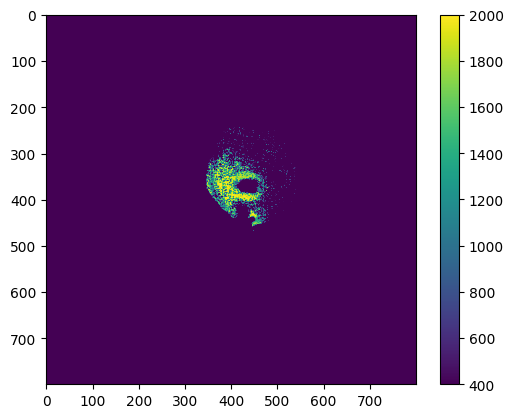

In [12]:
therm_image = np.array(Image.open(r'C:\Users\broke\Documents\Northwestern Files\PSED_2025\(250121)-laser-only-calibration\MeltPoolImages\experiment1-4-no-powder\exp1_thermalImg_t3.57.tif'))
plt.figure()
plt.imshow(therm_image)
plt.colorbar()
plt.clim(np.min(calibration_arr[:,1]),np.max(calibration_arr[:,1]))

In [84]:
img_numbers = np.arange(2518,2641)
experimentNum = 16
total_time = (img_numbers.max() - img_numbers.min())/100
print(total_time)
fps_movie = 10
make_movie = False
p_size = 6.089
filepath = r'C:\Users\broke\Documents\Northwestern Files\PSED_2025\(250124)-calibration\experiment13-16'

bins = 160
avg_temp = np.zeros(len(img_numbers))
hist_save = np.zeros([len(img_numbers)+1,bins])
melt_400_2000C_area = np.zeros(len(img_numbers))
melt_measure_save = np.zeros((len(img_numbers),4))
hist_save[0,:] = np.linspace(calibration_arr[:,1].min(),calibration_arr[:,1].max(),bins)
save_img_nums = np.linspace(img_numbers.min(),img_numbers.max(),int(fps_movie*total_time),dtype = int)
print(save_img_nums)
for i in range(len(img_numbers)):
    meltpool_file = 'experiment13-16_' + str(img_numbers[i]) + '.bmp'
    meltpool_img = np.array(Image.open(filepath + '\\' + meltpool_file))
    ratio_image_i = meltpool_img[:,:,0]/meltpool_img[:,:,1]
    gray_melt = rgb2gray(meltpool_img)
    mask_i = np.logical_and(gray_melt > np.percentile(gray_melt,95), calibration_arr[:,0].min() < ratio_image_i, calibration_arr[:,0].max() > ratio_image_i)
    therm_image = np.where(mask_i, np.interp(ratio_image_i,calibration_arr[:,0],calibration_arr[:,1]), 0).astype(np.float32)
    if np.any(img_numbers[i] == save_img_nums) and make_movie:
        img_file = '\\exp' + str(experimentNum) + '_thermalImg_Frame' + str(img_numbers[i]) + '.tif'
        img_to_save = Image.fromarray(therm_image, mode = 'F')
        img_to_save.save(filepath + '\\movie_exp' + str(experimentNum) + img_file)
    mask_total_i = remove_small_objects(rgb2gray(meltpool_img) > np.percentile(rgb2gray(meltpool_img),95))
    label_i = label(mask_total_i)
    props = regionprops(label_i)
    if len(props) != 0:
        prop_ind = 0
        if len(props) > 1:
            props_area = np.zeros(len(props))
            for j in range(len(props)):
                props_area[j] = props[j].area
            prop_ind = np.argmax(props_area)
        melt_measure_save[i,:] = [props[prop_ind].area*p_size**2, props[prop_ind].axis_major_length*p_size,
                         props[prop_ind].axis_minor_length*p_size, props[prop_ind].orientation]
    melt_400_2000C_area[i] = np.sum(mask_i)
    avg_temp[i] = np.mean(therm_image[therm_image > 0])
    hist_save[i+1,:] = np.histogram(therm_image.flatten(),bins = bins, range=(calibration_arr[:,1].min(),calibration_arr[:,1].max()))[0]

avg_temp_fn = filepath + '\\exp' + str(experimentNum) + '_avg_temp.csv'
hist_fn = filepath + '\\exp' + str(experimentNum) + '_hist.csv'
melt_area_fn = filepath + '\\exp' + str(experimentNum) + '_melt_area.csv'
melt_props_fn = filepath + '\\exp' + str(experimentNum) + '_melt_props.csv'
np.savetxt(avg_temp_fn,avg_temp,delimiter=',')
np.savetxt(hist_fn,hist_save,delimiter=',')
np.savetxt(melt_area_fn,melt_400_2000C_area,delimiter=',')
np.savetxt(melt_props_fn,melt_measure_save, delimiter=',')

1.22
[2518 2529 2540 2551 2562 2573 2584 2595 2606 2617 2628 2640]


C:\Users\broke\AppData\Local\Temp\ipykernel_9332\262795375.py:21: RuntimeWarning: divide by zero encountered in divide
  ratio_image_i = meltpool_img[:,:,0]/meltpool_img[:,:,1]
C:\Users\broke\AppData\Local\Temp\ipykernel_9332\262795375.py:21: RuntimeWarning: invalid value encountered in divide
  ratio_image_i = meltpool_img[:,:,0]/meltpool_img[:,:,1]


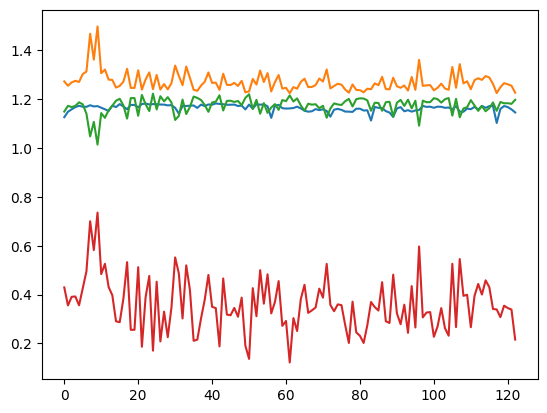

In [85]:
#plt.plot(np.abs(melt_measure_save[:,3]))
plt.plot(melt_measure_save[:,0]/10**6)
plt.plot(melt_measure_save[:,1:3]/10**3)
e = np.sqrt(1-(melt_measure_save[:,2]/melt_measure_save[:,1])**2)
plt.plot(e)

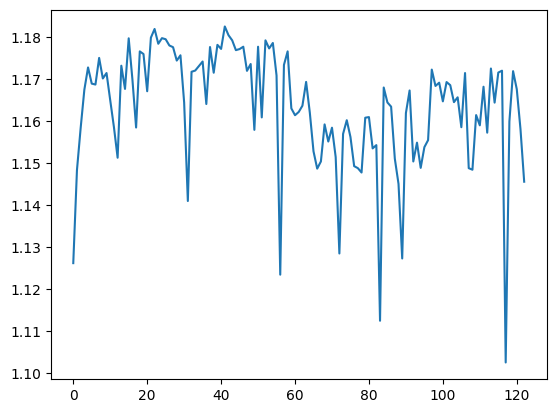

In [86]:
plt.plot(melt_measure_save[:,0]/10**6)

Text(0, 0.5, 'Avg. Histogram over Time [pixels]')

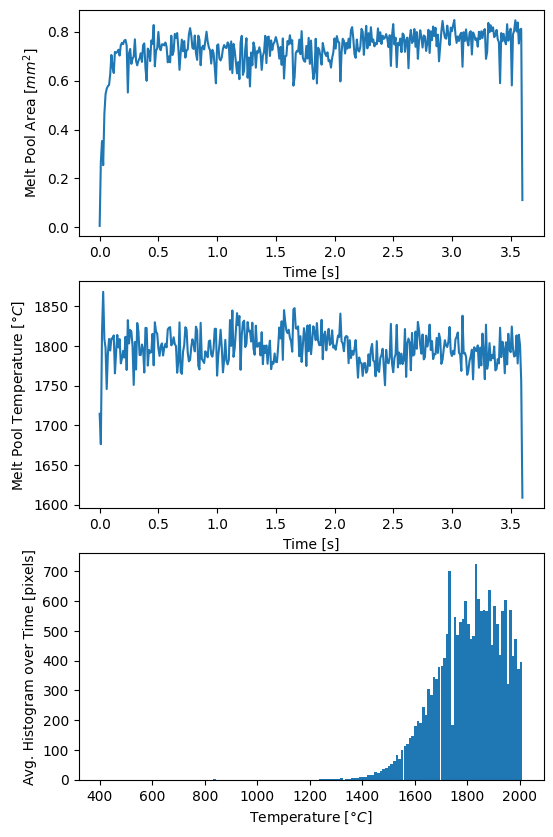

In [87]:
#Importing the files back in bc im dumb
file = r'C:\Users\broke\Documents\Northwestern Files\PSED_2025\(250124)-calibration\experiment9-12\exp9_'
avg_temp_np = np.loadtxt(file + 'avg_temp.csv', delimiter=',')
hist_load = np.loadtxt(file+'hist.csv',delimiter=',')
melt_area_load = np.loadtxt(file+'melt_area.csv',delimiter=',')
avg_hist = np.average(hist_load[1:,:], axis=0)
time = np.arange(0,len(melt_area_load))/100

fig, axs = plt.subplots(3,1,figsize=(6,10))
axs[0].plot(time,melt_area_load*(0.006089**2))
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Melt Pool Area [$mm^2$]')
axs[1].plot(time,avg_temp_np)
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Melt Pool Temperature [$\degree C$]')
axs[2].bar(hist_load[0,:],avg_hist.astype(int),align = 'edge', width = 10)
axs[2].set_xlabel('Temperature [$\degree C$]')
axs[2].set_ylabel('Avg. Histogram over Time [pixels]')

1576 1379


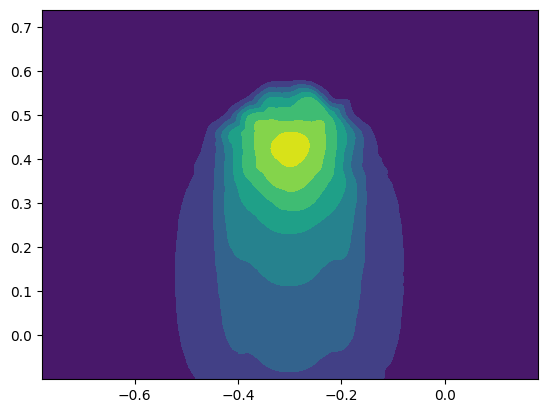

In [5]:
#Use this code to load the simulation code
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CloughTocher2DInterpolator

path = r'C:\Users\broke\Downloads\Temperature_MetalFraction_SolidFraction_t0_40.txt'
arr = np.loadtxt(path,skiprows=9,dtype=np.float32)
mask_metal = arr[:,3] > 0.1
metal_only = arr[mask_metal, :]
unique_2d_pts = np.unique(metal_only[:,:2],axis = 0)
unique_data_2d = np.zeros((unique_2d_pts.shape[0],3))
for i in range(unique_2d_pts.shape[0]):
    pt_mask = np.nonzero(np.logical_and(metal_only[:,0] == unique_2d_pts[i,0], metal_only[:,1] == unique_2d_pts[i,1]))[0]
    z_i = metal_only[pt_mask,2]
    max_ind = pt_mask[np.argmax(z_i)]
    unique_data_2d[i,:] = metal_only[max_ind, 3:]
interp = CloughTocher2DInterpolator(unique_2d_pts,unique_data_2d[:,1])
x_range = np.abs(unique_2d_pts[:,0].min() - unique_2d_pts[:,0].max()) * 1e4
y_range = np.abs(unique_2d_pts[:,1].min() - unique_2d_pts[:,1].max()) * 1e4
x_num = int(x_range/6.089)
y_num = int(y_range/6.089)
print(x_num, y_num)
X = np.linspace(unique_2d_pts[:,0].min(),unique_2d_pts[:,0].max(), x_num)
Y = np.linspace(unique_2d_pts[:,1].min(),unique_2d_pts[:,1].max(), y_num)
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
Z = interp(X, Y)
plt.contourf(X,Y,Z)

557.9377411241585 382.2613800237601 166398.0


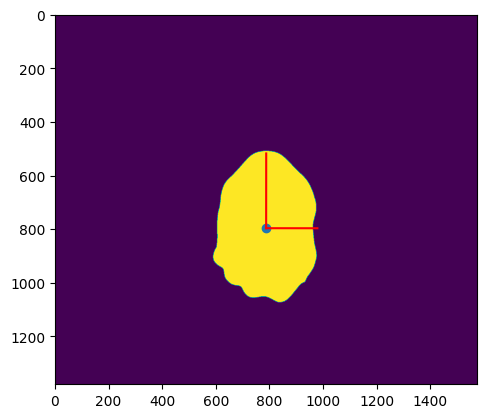

In [17]:
from skimage.measure import label, regionprops
mask = Z > 1200
mask_label = label(mask)
props = regionprops(mask_label)
orient = props[0].orientation
mj_axis = props[0].axis_major_length
mn_axis = props[0].axis_minor_length
y0, x0 = props[0].centroid
x1 = x0 + np.cos(orient) * 0.5 * mn_axis
y1 = y0 - np.sin(orient) * 0.5 * mn_axis
x2 = x0 - np.sin(orient) * 0.5 * mj_axis
y2 = y0 - np.cos(orient) * 0.5 * mj_axis
print(mj_axis, mn_axis, props[0].area)
plt.imshow(mask)
plt.plot((x0, x1),(y0, y1), '-r')
plt.plot((x0, x2),(y0, y2), '-r')
plt.scatter(x0,y0)

In [10]:
temp_range = np.logical_and(mask, Z < 2273.15)
print(np.mean(Z[temp_range]))

1831.8749563315484


In [ ]:
def virtual_sensor_img(path, pixel_size, skiprow = 9):
    arr = np.loadtxt(path,skiprows=skiprow,dtype=np.float32)
    mask_metal = arr[:,3] > 0.1
    metal_only = arr[mask_metal, :]
    unique_2d_pts = np.unique(metal_only[:,:2],axis = 0)
    unique_data_2d = np.zeros((unique_2d_pts.shape[0],3))
    for i in range(unique_2d_pts.shape[0]):
        pt_mask = np.nonzero(np.logical_and(metal_only[:,0] == unique_2d_pts[i,0], metal_only[:,1] == unique_2d_pts[i,1]))[0]
        z_i = metal_only[pt_mask,2]
        max_ind = pt_mask[np.argmax(z_i)]
        unique_data_2d[i,:] = metal_only[max_ind, 3:]
    interp_temp = CloughTocher2DInterpolator(unique_2d_pts,unique_data_2d[:,1])
    x_range = np.abs(unique_2d_pts[:,0].min() - unique_2d_pts[:,0].max()) * 1e4
    y_range = np.abs(unique_2d_pts[:,1].min() - unique_2d_pts[:,1].max()) * 1e4
    x_num = int(x_range/pixel_size)
    y_num = int(y_range/pixel_size)
    X = np.linspace(unique_2d_pts[:,0].min(),unique_2d_pts[:,0].max(), x_num)
    Y = np.linspace(unique_2d_pts[:,1].min(),unique_2d_pts[:,1].max(), y_num)
    X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
    temp = interp_temp(X, Y)
    return temp